In [104]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

## Load in Results

In [105]:
results_file = 'fit_results.json'
try:
    with open(results_file, 'r') as f:
        results = json.load(f)
except:
    results = {} # dictionary to record the test results

p_p1 = {'B':[0.1297294917, 0.0054263152, 0.0043597670],
        'R':[0.1309207067, 0.0075262085, 0.0075646316],
        'TESS':[0.1343033570, 0.0000104264, 0.0000243049]}

depth = {}
for key in p_p1.keys():
    median, upper, lower = p_p1[key]
    depth[key] = [median**2, (median+upper)**2-median**2, median**2-(median-lower)**2]
print(depth)

{'B': [0.01682974101674037, 0.0014373511220497175, 0.0011121731453865788], 'R': [0.017140231442827426, 0.002027316885568564, 0.0019235101787505853], 'TESS': [0.018037391701469452, 2.8007097526705493e-06, 6.527868594931319e-06]}


In [106]:
def load_data(results, tess=False):
    times_lc = np.array(results['times_lc'])
    data_lc = np.array(results['data_lc'])
    errors_lc = np.array(results['errors_lc'])
    transit_model = np.array(results['transit_model'])
    phases = np.array(results['phases'])
    if not tess:
        data_lc = data_lc - (transit_model[-1] - 1)
        transit_model = transit_model - (transit_model[-1] - 1)
    
    return times_lc, data_lc, errors_lc, transit_model, phases

## Plot Figure

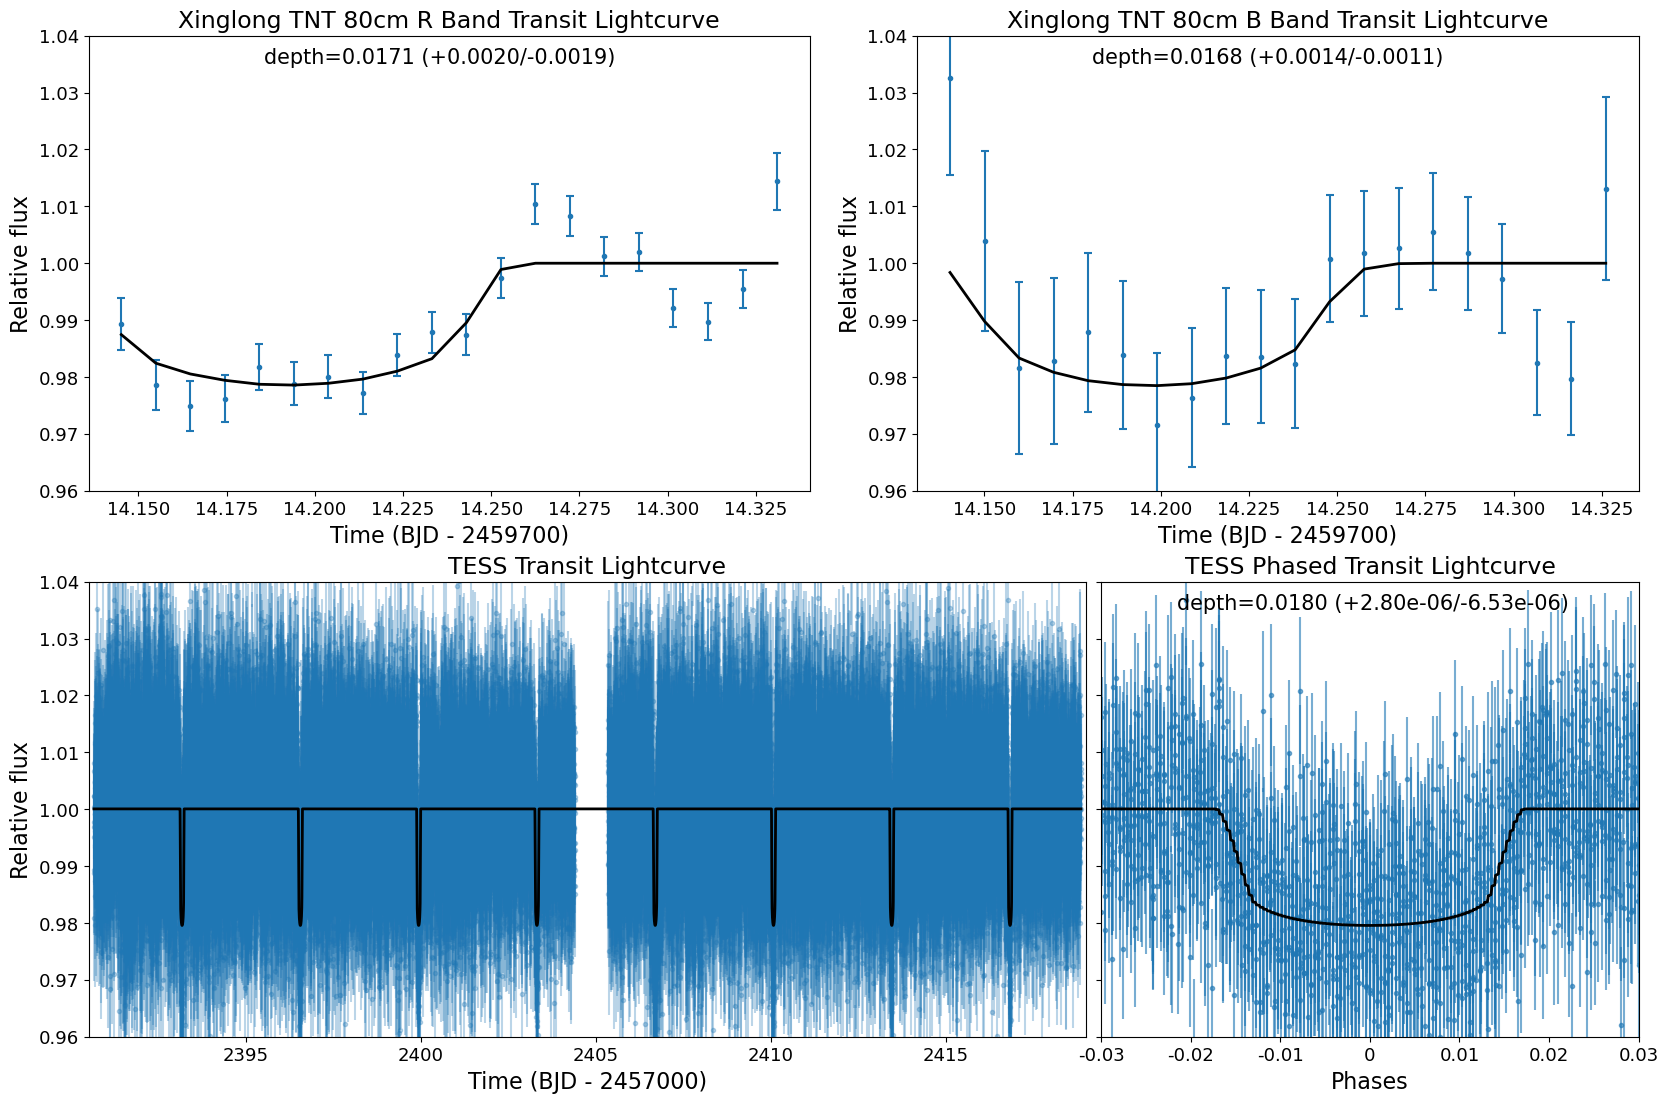

In [107]:
plt.figure(figsize=(20,13))
gs = gridspec.GridSpec(2, 17)

# R-band
ax1 = plt.subplot(gs[0,0:8])
times_lc, data_lc, errors_lc, transit_model, phases = load_data(results['R-band'])

ax1.errorbar(times_lc-2459700, data_lc, yerr = errors_lc, 
             fmt = '.', alpha = 1, linewidth=1.5, capsize=3, capthick=1.5)
ax1.plot(times_lc-2459700, transit_model, color='black', zorder=10, linewidth=2)
ax1.set_xlabel('Time (BJD - 2459700)', fontsize=16)
ax1.set_ylabel('Relative flux', fontsize=16)
ax1.set_ylim([0.96,1.04])
ax1.set_title('Xinglong TNT 80cm R Band Transit Lightcurve', fontsize=17)
ax1.set_title('depth={:.4f} (+{:.4f}/-{:.4f})'.format(depth['R'][0],depth['R'][1],depth['R'][2]), 
              loc='right', x=0.73, y=0.92, fontsize=15)
ax1.tick_params(labelsize=13)


# B-band
ax2 = plt.subplot(gs[0,9:17])
times_lc, data_lc, errors_lc, transit_model, phases = load_data(results['B-band'])
ax2.errorbar(times_lc-2459700, data_lc, yerr = errors_lc,
             fmt = '.', alpha = 1, linewidth=1.5, capsize=3, capthick=1.5)
ax2.plot(times_lc-2459700, transit_model, color='black', zorder=10, linewidth=2)
ax2.set_xlabel('Time (BJD - 2459700)', fontsize=16)
ax2.set_ylabel('Relative flux', fontsize=16)
ax2.set_ylim([0.96,1.04])
ax2.set_title('Xinglong TNT 80cm B Band Transit Lightcurve', fontsize=17)
ax2.set_title('depth={:.4f} (+{:.4f}/-{:.4f})'.format(depth['B'][0],depth['B'][1],depth['B'][2]), 
              loc='right', x=0.73, y=0.92, fontsize=15)
ax2.tick_params(labelsize=13)


# TESS transit lightcurve:
ax3 = plt.subplot(gs[1,0:11])
times_lc, data_lc, errors_lc, transit_model, phases = load_data(results['TESS'], True)
# plot time v/s flux plot:
ax3.errorbar(times_lc, data_lc, errors_lc, fmt = '.', alpha = 0.3)
# plot the model
ax3.plot(times_lc, transit_model, color='black', zorder=10, linewidth=2)
ax3.set_xlim([2390.5, 2419])
ax3.set_ylim([0.96,1.04])
ax3.set_xlabel('Time (BJD - 2457000)', fontsize=16)
ax3.set_ylabel('Relative flux', fontsize=16)
ax3.set_title('TESS Transit Lightcurve', fontsize=17)
ax3.tick_params(labelsize=13)


# TESS phased transit lightcurve
ax4 = plt.subplot(gs[1,11:17])
ax4.errorbar(phases, data_lc, yerr = errors_lc, fmt = '.', alpha = 0.6)
idx = np.argsort(phases)
ax4.plot(phases[idx], transit_model[idx],color='black', zorder=10, linewidth=2)
ax4.yaxis.set_major_formatter(plt.NullFormatter())
ax4.set_xlabel('Phases', fontsize=16)
ax4.set_xlim([-0.03,0.03])
ax4.set_xticks([-0.03,-0.02,-0.01,0,0.01,0.02,0.03])
ax4.set_xticklabels(['-0.03','-0.02','-0.01','0','0.01','0.02','0.03'])
ax4.set_ylim([0.96,1.04])
ax4.set_title('TESS Phased Transit Lightcurve', fontsize=17)
ax4.set_title('depth={:.4f} (+{:.2e}/-{:.2e})'.format(depth['TESS'][0],depth['TESS'][1],depth['TESS'][2]), 
              loc='right', x=0.87, y=0.92, fontsize=15)
ax4.tick_params(labelsize=13)

plt.savefig(os.path.join('figures', 'figure.jpg'))